In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
import folium
import warnings
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../src/models')
sys.path.append('../src/visualization')
# import modules
import visualize
from maritime_traffic_network import MaritimeTrafficNetwork

['/Users/janhendrikwebert/maritime_route_prediction/notebooks', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python311.zip', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/lib-dynload', '', '/Users/janhendrikwebert/miniforge3/envs/env_geo/lib/python3.11/site-packages', '../src/models', '../src/visualization', '../visualization']


In [3]:
# read raw data from file
filename = '../data/processed/202204_points_stavanger_cleaned_meta_200k.parquet'
gdf = gpd.read_parquet(filename)

In [4]:
# initialize maritime traffic network
network = MaritimeTrafficNetwork(gdf)
network.get_trajectories_info()

AIS messages: 192346
Trajectories: 249


In [5]:
# compute Douglas Peucker significant points
network.calc_significant_points_DP(0.002)

Calculating significant turning points with Douglas Peucker algorithm (tolerance = 0.002) ...
Number of significant points detected: 2924 (1.52% of AIS messages)
Time elapsed: 0.12 minutes
Adding course over ground before and after each turn ...
Done. Time elapsed: 0.01 minutes


In [6]:
for mmsi in network.significant_points.mmsi.unique():
    subset = network.significant_points[network.significant_points.mmsi == mmsi]
    for i in range(0, len(subset)):
        a=1
    break

                            mmsi   imo_nr  length      lon      lat   sog  \
date_time_utc                                                               
2022-04-01 06:30:21  209989000_0  9235505      90  4.62360  59.5881  10.0   
2022-04-01 07:23:40  209989000_0  9235505      90  4.66145  59.4478  10.0   
2022-04-01 08:47:21  209989000_0  9235505      90  4.71771  59.2073  10.5   
2022-04-01 09:04:00  209989000_0  9235505      90  4.76252  59.1618  11.0   
2022-04-01 10:52:00  209989000_0  9235505      90  5.07398  58.8951  10.0   
2022-04-01 11:28:20  209989000_0  9235505      90  5.16866  58.8028  10.1   
2022-04-01 12:11:30  209989000_0  9235505      90  5.29447  58.7011  10.2   
2022-04-01 13:37:30  209989000_0  9235505      90  5.52160  58.4840  10.2   
2022-04-01 14:03:20  209989000_0  9235505      90  5.62935  58.4301  10.8   
2022-04-01 14:26:50  209989000_0  9235505      90  5.73327  58.3883  10.2   
2022-04-01 15:00:40  209989000_0  9235505      90  5.86806  58.3215  10.3   

In [7]:
# compute clusters
method = 'HDBSCAN'      # 'DBSCAN' , 'HDBSCAN', 'OPTICS'
metric = 'euclidean'  # 'euclidean', 'mahalanobis'
min_samples = 10
min_cluster_size = 10
eps = 0.02
network.calc_waypoints_clustering(method=method, min_samples=min_samples, min_cluster_size=min_cluster_size,
                                  eps=eps, metric=metric)

Calculating waypoints with HDBSCAN (min_samples = 10) ...
Distance metric: euclidean
86 clusters detected
Time elapsed: 0.01 minutes


In [8]:
# create graph adjacency matrix
n_clusters = len(network.waypoints)
A = np.zeros((n_clusters, n_clusters))  # init adjacency matrix
for mmsi in network.significant_points.mmsi.unique():
    subset = network.significant_points[network.significant_points.mmsi == mmsi]
    #subset = gdf[gdf.mmsi == mmsi]
    print(subset)
    for i in range(0, len(subset)):
        a=1
    break

         date_time_utc         mmsi   imo_nr  length      lon      lat   sog  \
0  2022-04-01 06:30:21  209989000_0  9235505      90  4.62360  59.5881  10.0   
1  2022-04-01 07:23:40  209989000_0  9235505      90  4.66145  59.4478  10.0   
2  2022-04-01 08:47:21  209989000_0  9235505      90  4.71771  59.2073  10.5   
3  2022-04-01 09:04:00  209989000_0  9235505      90  4.76252  59.1618  11.0   
4  2022-04-01 10:52:00  209989000_0  9235505      90  5.07398  58.8951  10.0   
5  2022-04-01 11:28:20  209989000_0  9235505      90  5.16866  58.8028  10.1   
6  2022-04-01 12:11:30  209989000_0  9235505      90  5.29447  58.7011  10.2   
7  2022-04-01 13:37:30  209989000_0  9235505      90  5.52160  58.4840  10.2   
8  2022-04-01 14:03:20  209989000_0  9235505      90  5.62935  58.4301  10.8   
9  2022-04-01 14:26:50  209989000_0  9235505      90  5.73327  58.3883  10.2   
10 2022-04-01 15:00:40  209989000_0  9235505      90  5.86806  58.3215  10.3   

      cog  true_heading  nav_status  ..

In [9]:
mmsi = '219347000_0'
trajectory = network.trajectories.get_trajectory(mmsi)
DP_trajectory = network.significant_points_trajectory.get_trajectory(mmsi)


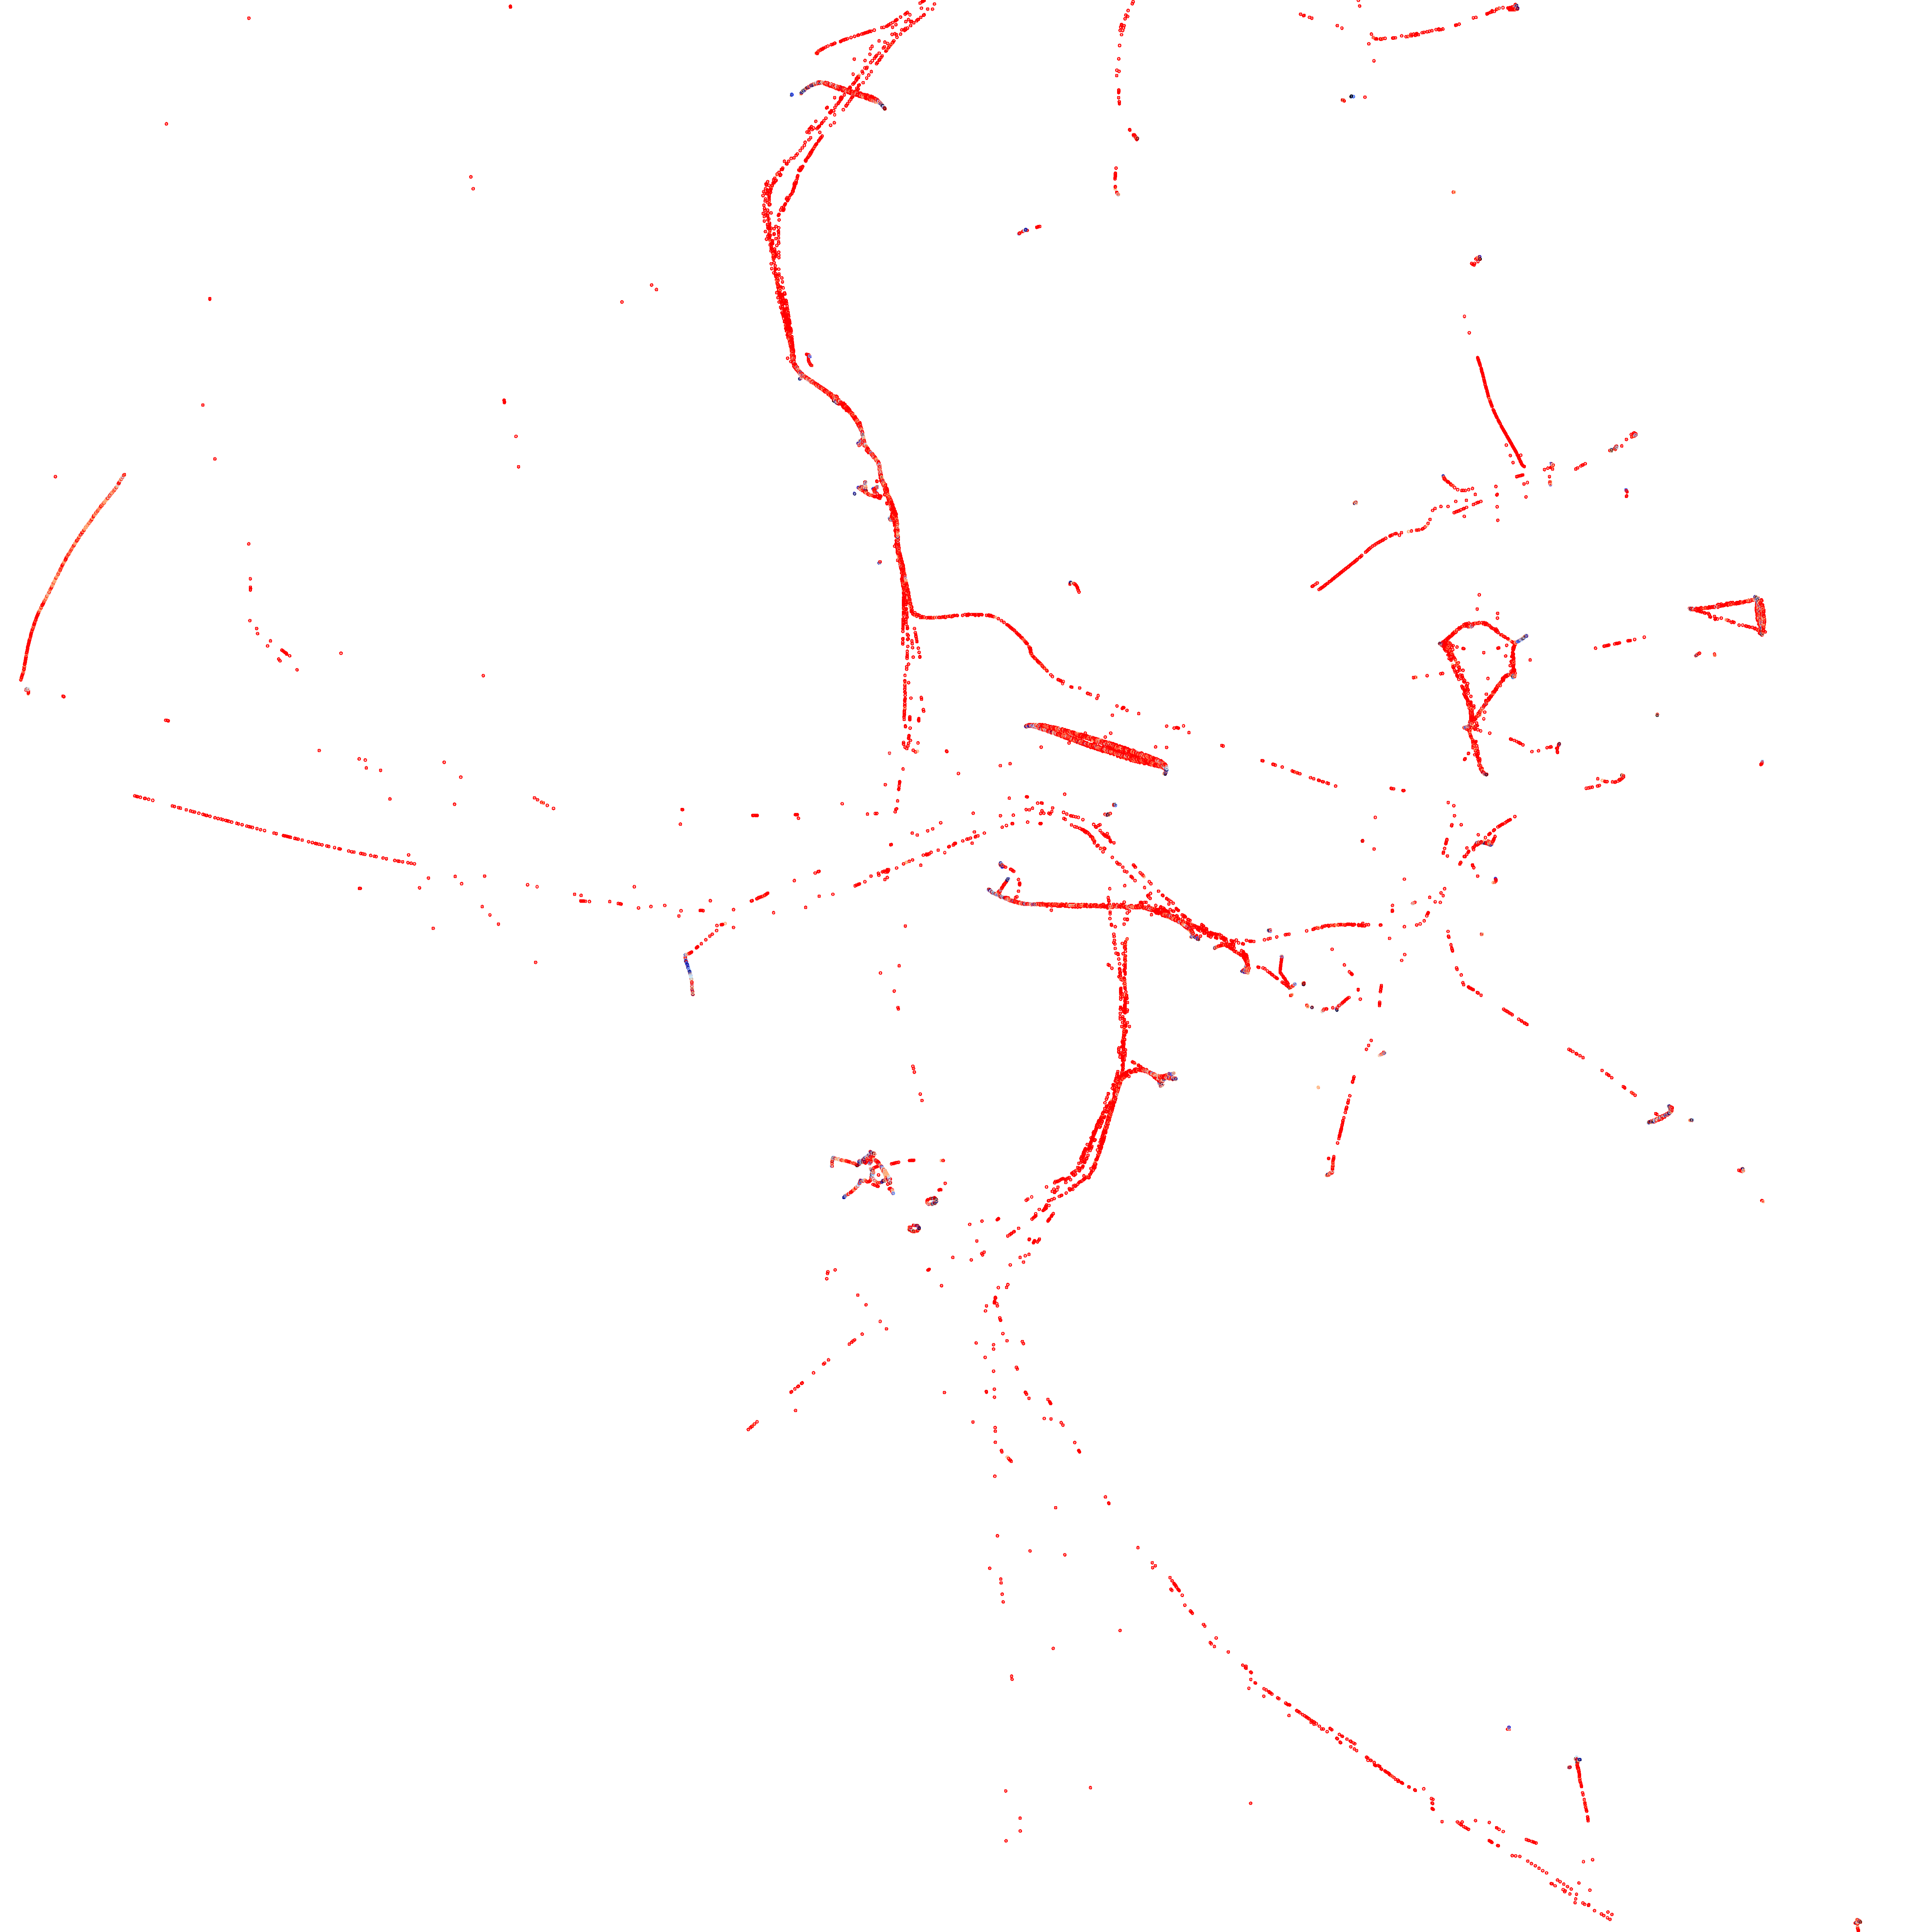

In [12]:
map = network.map_waypoints()
map = visualize.map_accurate_and_simplified_trajectory(trajectory, DP_trajectory, map=map)
folium.LayerControl().add_to(map)
map

In [ ]:
trajectory.get_crs()